In [1]:
# Obtenido de https://stackoverflow.com/a/29597209
def hierarchy_pos(G, root=None, width=1, vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.  
    Licensed under Creative Commons Attribution-Share Alike 

    If the graph is a tree this will return the positions to plot this in a 
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch 
    - if the tree is directed and this is not given, 
      the root will be found and used
    - if the tree is directed and this is given, then 
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given, 
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            dx = width/len(children) 
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap, 
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [49]:
class Nodo:
    def __init__(self, valor):
        self.valor = valor
        self.izq = None
        self.der = None

    def __str__(self):
        return ("valor : {}".format(self.valor))

class ArbolBiselado:
    def __init__(self, G):
        self.raiz = None
        self.G = G
    def insertar(self, nodo, padre = None):
        if self.raiz == None:
            self.raiz = nodo
            self.G.add_node(nodo.valor)
            return
        if padre == None:
            padre = self.raiz
        # Si el nodo es menor que el padre
        if nodo.valor < padre.valor:
            # Se va a la izq
            # Si el hijo izq está vacío
            if padre.izq == None:
                # Se agrega el hijo y ya
                padre.izq = nodo
                self.G.add_edge(padre.valor, nodo.valor)
                return
            # Si no, se pasa este nodo con un nuevo padre
            else:
                self.insertar(nodo, padre.izq)
        else:
            if padre.der == None:
                # Se agrega el hijo y ya
                padre.der = nodo
                self.G.add_edge(padre.valor, nodo.valor)
                return
            else:
                self.insertar(nodo, padre.der)
    
    def buscar(self, valor, actual = None):
        if self.raiz == None:
            print('No se encuentra')
            return
        else:
            if actual == None:
                actual = self.raiz
            if actual.valor == valor:
                return actual
            elif valor < actual.valor:
                # Si es menor
                if actual.izq == None:
                    print('No se encuentra')
                    return
                else:
                    print('A la izquierda')
                    self.buscar(valor, actual.izq)
            else:
                # Si es mayor
                if actual.der == None:
                    print('No se encuentra')
                    return
                else:
                    print('A la derecha')
                    self.buscar(valor, actual.der)
                    
    def rotar(self, actual, padre):

SyntaxError: unexpected EOF while parsing (<ipython-input-49-790bba392953>, line 68)

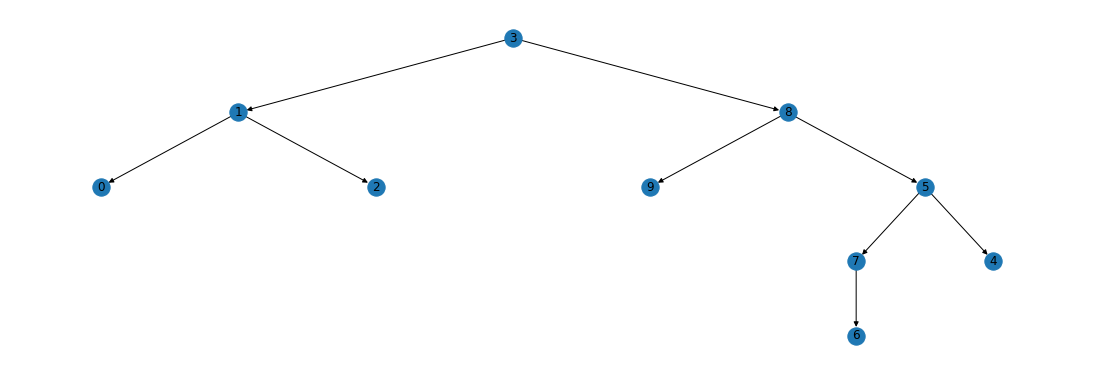

In [46]:
from random import shuffle
import networkx as nx
import matplotlib.pyplot as plt

x = list(range(10))
shuffle(x)
G = nx.DiGraph()
A = ArbolBiselado(G)
for i in x:
    n = Nodo(i)
    A.insertar(n)

pos = hierarchy_pos(A.G, A.raiz.valor)
plt.figure(figsize=(15,5))
nx.draw(A.G, pos = pos, with_labels=True, arrows=True)

In [48]:
print(A.buscar(7))

A la derecha
A la izquierda
A la derecha
None
